#  

# HISTORICAL GAS PRICES IN BRAZIL (DATA VISUALIZATION)

This notebook is an Data Visualization exercise. I am using the 'Gas Prices in Brazil' data set, which was retrieved from Kaggle's website https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil. The purpose of this exercise is to gain practice in Data Visualization using Python. 

# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd # Used for Data Frames
import matplotlib.pyplot as plt # Used for Plotting Charts
import seaborn as sns # Used to create nicer charts using Seaborn

%matplotlib inline

# IMPORTING THE DATASET (Weekly Gas Prices 2012-2019)

In [3]:
#Importing the csv file
data = pd.read_csv('brazil_gas_data.csv')

#Removing LPG and NGV fuels (They are measured in $R/Kg while other fuels are measured in $R/l)
data = data[~data['Product'].isin(['LPG', 'NGV'])]
# Observing prices between 2012-2019 f
data = data[data['Year'].between(2012,2019)]
data['Initial_Observed_Date'] = pd.to_datetime(data['Initial_Observed_Date'])
data['Final_Observed_Date'] = pd.to_datetime(data['Final_Observed_Date'])


# Distribution of Weekly Gas Prices

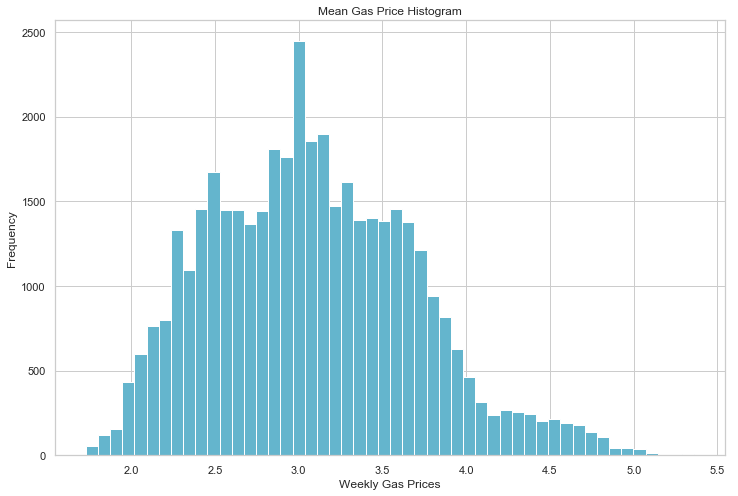

In [29]:
# Setting the style of the charts for all charts
sns.set(style='whitegrid')
# Creating a historgram of the 'Mean Gas Price'
x = plt.hist(data['Mean_Mkt_Value'], bins = 50, facecolor='C', edgecolor='w')
plt.title('Mean Gas Price Histogram') # setting the title of the chart
plt.xlabel('Mean Gas Prices') # setting the x-axis label
plt.ylabel('Frequency') # setting the y-axis label
plt.rcParams["figure.figsize"] = (12,8) # Setting the display size of the chart 

plt.show()

# Distribution of Weekly Mean Price Percentage Change

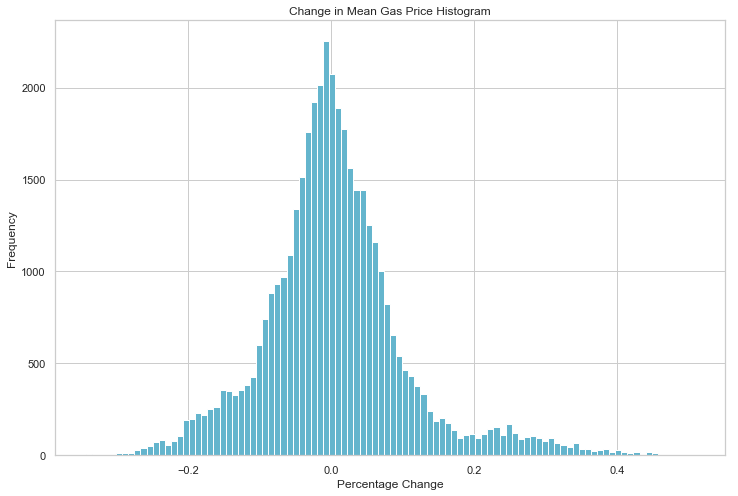

In [28]:
delta_price = data['Mean_Mkt_Value'].pct_change()
x = plt.hist(delta_price, bins = 100, facecolor='C', edgecolor='w')
plt.title('Change in Mean Gas Price Histogram') # setting the title of the chart
plt.xlabel('Percentage Change') # setting the x-axis label
plt.ylabel('Frequency') # setting the y-axis label
plt.rcParams["figure.figsize"] = (12,8) # Setting the display size of the chart 


# Distribution of (+/-) 5% Weekly Price Change

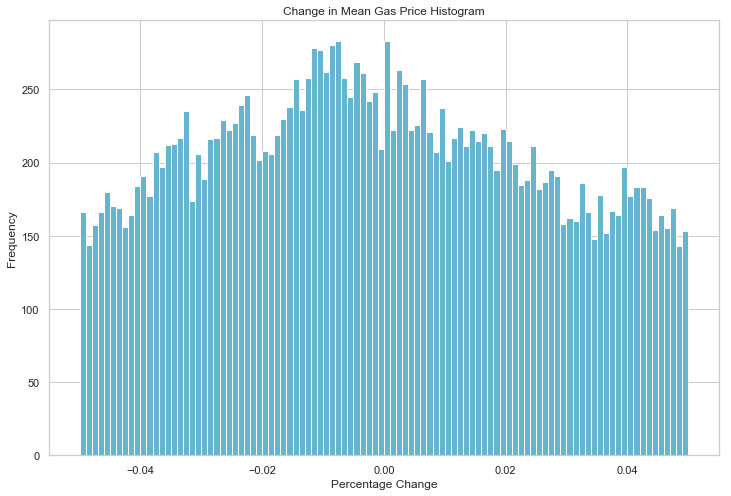

In [27]:
delta_price = data['Mean_Mkt_Value'].pct_change()
x = plt.hist(delta_price, bins = 100, facecolor='C', edgecolor='w', range=(-0.05,0.05))
plt.title('Change in Mean Gas Price Histogram') # setting the title of the chart
plt.xlabel('Percentage Change') # setting the x-axis label
plt.ylabel('Frequency') # setting the y-axis label
plt.rcParams["figure.figsize"] = (12,8) # Setting the display size of the chart 

# Mean Monthly Prices (2012-2019)

In [31]:
monthly_mean = data.groupby('Month').Mean_Mkt_Value.agg('mean')
monthly_mean

Month
1     3.052583
2     3.091666
3     3.096634
4     3.135304
5     3.149119
6     3.086704
7     3.021470
8     2.994344
9     3.038626
10    3.104747
11    3.098272
12    3.126291
Name: Mean_Mkt_Value, dtype: float64

Text(0.5, 1.0, 'Average Monthly Prices')

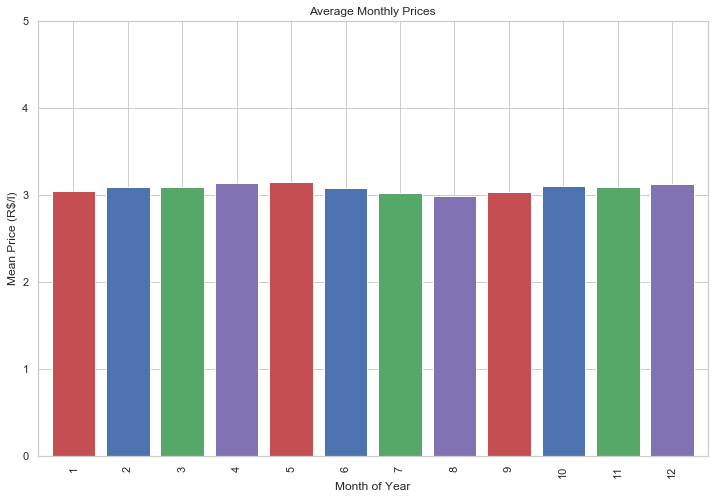

In [12]:
monthly_mean.plot(kind='bar', color=['r','b','g','m'], width=0.8)
axes = plt.gca()
axes.set_ylim([0,5])
plt.xlabel('Month of Year')
plt.ylabel('Mean Price (R$/l)')
plt.title("Average Monthly Prices")

# Annual Mean Product Prices

In [355]:
dat = data.groupby(['Year','Product']).Mean_Mkt_Value.agg('mean').unstack()

Text(0.5, 1.0, 'Mean Product Price per Year')

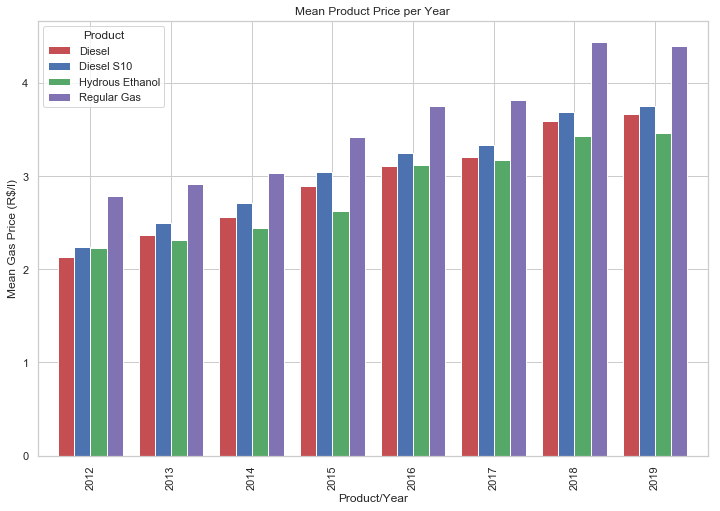

In [356]:
dat.plot(kind='bar', color=['r','b','g','m'], width=0.8)
plt.ylabel('Mean Gas Price (R$/l)')
plt.xlabel('Product/Year')
plt.title('Mean Product Price per Year')

# Average Weekly Product Prices by Region

Text(0.5, 1.0, 'Product Prices by Region')

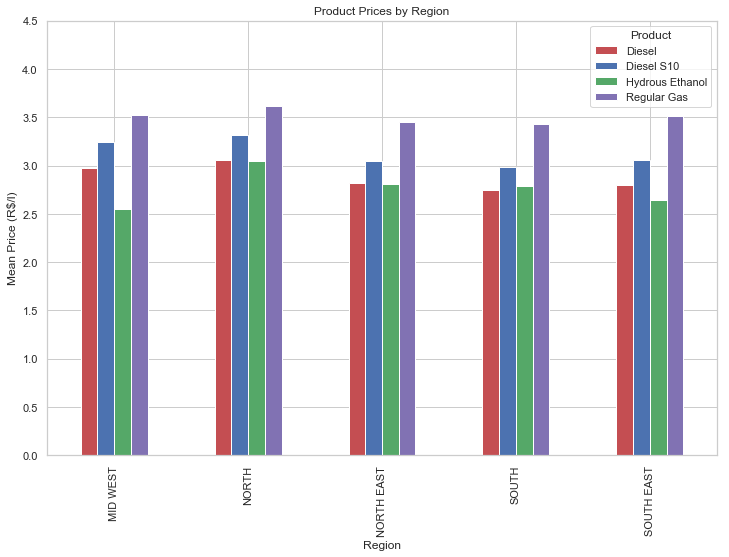

In [365]:
products = data[~data['Product'].isin(['LPG','NGV'])]
reg_prod = products.groupby(['Region','Product']).Mean_Mkt_Value.agg('mean').unstack()
reg_prod.plot(kind='bar', color=['r','b','g','m'])
axes = plt.gca()
axes.set_ylim([0,4.5])
plt.ylabel('Mean Price (R$/l)')
plt.title("Product Prices by Region")

# Annual Mean Prices by Region

In [358]:
dat = price_per_region.groupby(['Region','Year']).Mean_Mkt_Value.agg('mean').unstack()

Text(0.5, 1.0, 'Regional Mean Price by Year')

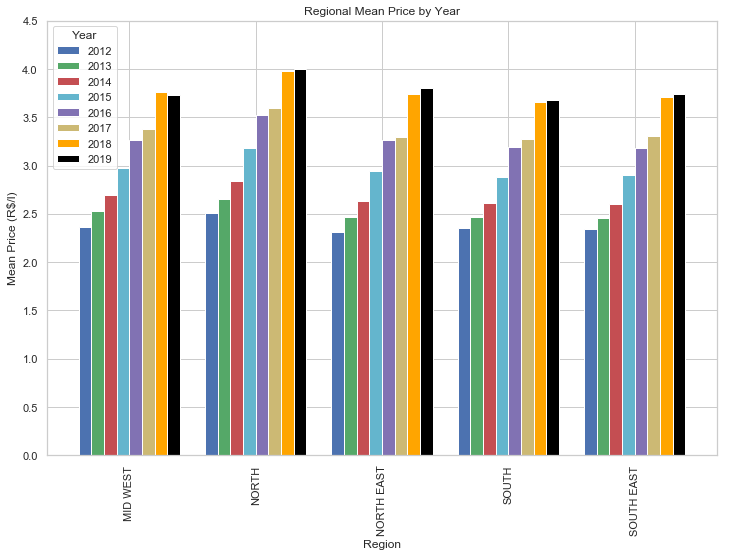

In [359]:
dat.plot(kind='bar', color=['b', 'g', 'r', 'c', 'm', 'y', 'orange','black'], width=0.8)
axes = plt.gca()
axes.set_ylim([0,4.5])
plt.ylabel('Mean Price (R$/l)')
plt.title('Regional Mean Price by Year')

# Historical Prices in Mid West States

Text(0.5, 1.0, "Historical, Mid West States' Mean Price")

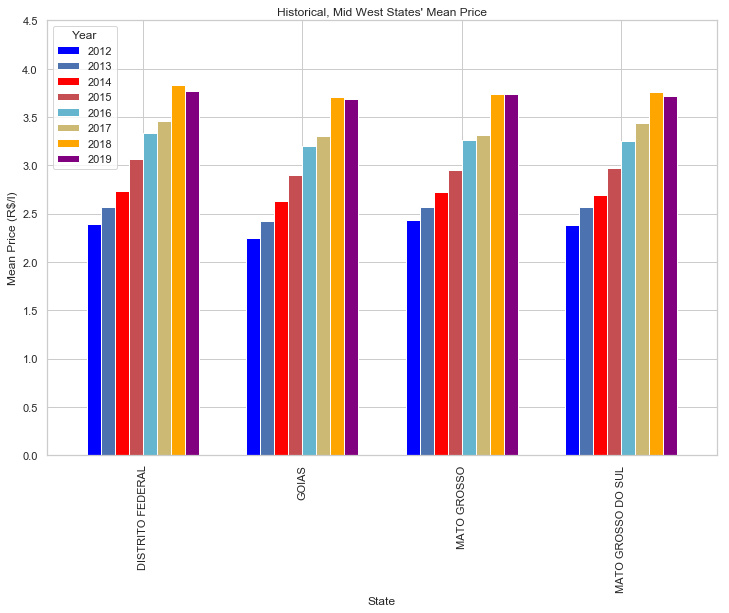

In [360]:
midwest = data[data['Region'] == 'MID WEST'].groupby(['State','Year']).Mean_Mkt_Value.agg('mean').unstack()
midwest.plot(kind='bar', color=['blue', 'b', 'red', 'r', 'c', 'y', 'orange','purple'], width=0.7)
axes = plt.gca()
axes.set_ylim([0,4.5])
plt.ylabel('Mean Price (R$/l)')
plt.title("Historical, Mid West States' Mean Price")

# Historical Prices in Northern States

Text(0.5, 1.0, "Historical, North States' Mean Price")

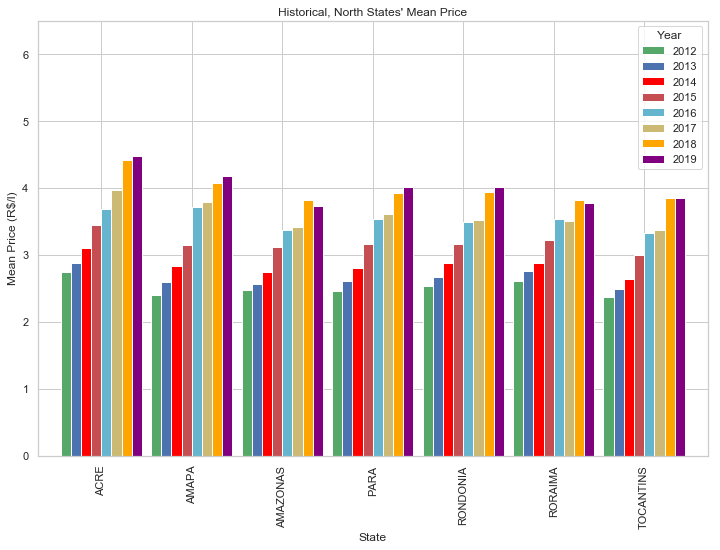

In [361]:
north = data[data['Region'] == 'NORTH'].groupby(['State','Year']).Mean_Mkt_Value.agg('mean').unstack()
north.plot(kind='bar', color=['g', 'b', 'red', 'r', 'c', 'y', 'orange','purple'], width=0.9)
axes = plt.gca()
axes.set_ylim([0,6.5])
plt.ylabel('Mean Price (R$/l)')
plt.title("Historical, North States' Mean Price")

# Historical Prices in North Eastern States

Text(0.5, 1.0, "Historical, North East States' Mean Price")

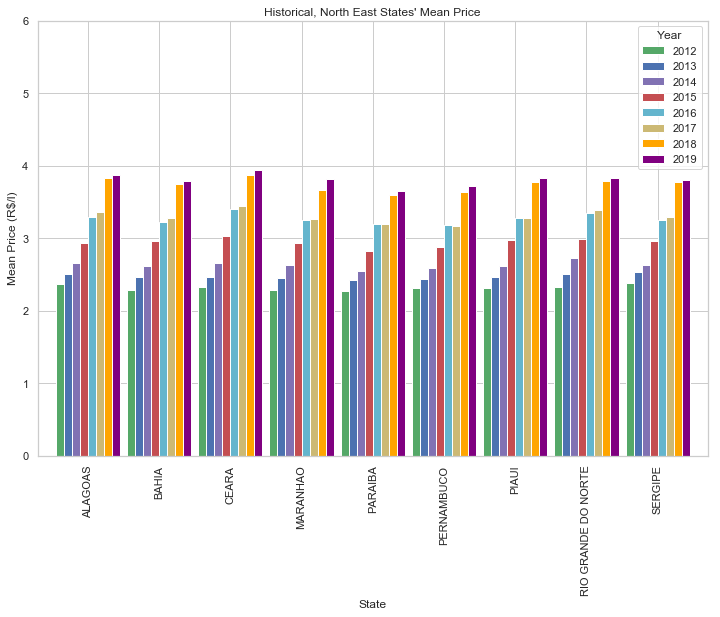

In [362]:
northeast = data[data['Region'] == 'NORTH EAST'].groupby(['State','Year']).Mean_Mkt_Value.agg('mean').unstack()
northeast.plot(kind='bar', color=['g', 'b', 'm', 'r', 'c', 'y', 'orange','purple'], width=0.9)
axes = plt.gca()
axes.set_ylim([0,6.0])
plt.ylabel('Mean Price (R$/l)')
plt.title("Historical, North East States' Mean Price")

# Historical Prices in Southern States

Text(0.5, 1.0, "Historical, South States' Mean Price")

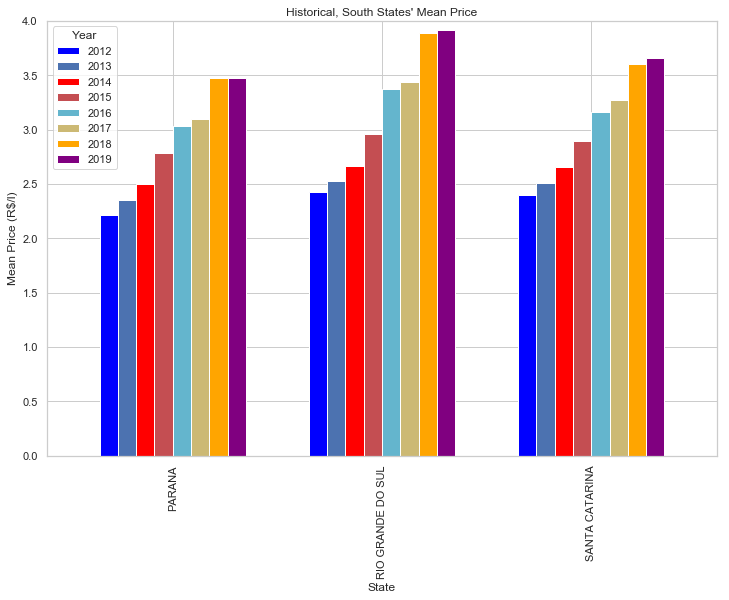

In [32]:
south = data[data['Region'] == 'SOUTH'].groupby(['State','Year']).Mean_Mkt_Value.agg('mean').unstack()
south.plot(kind='bar', color=['blue', 'b', 'red', 'r', 'c', 'y', 'orange','purple'], width=0.7)
axes = plt.gca()
axes.set_ylim([0,4.0])
plt.ylabel('Mean Price (R$/l)')
plt.title("Historical, South States' Mean Price")

# Historical Prices in South Eastern States

Text(0.5, 1.0, "Historical, South East States' Mean Price")

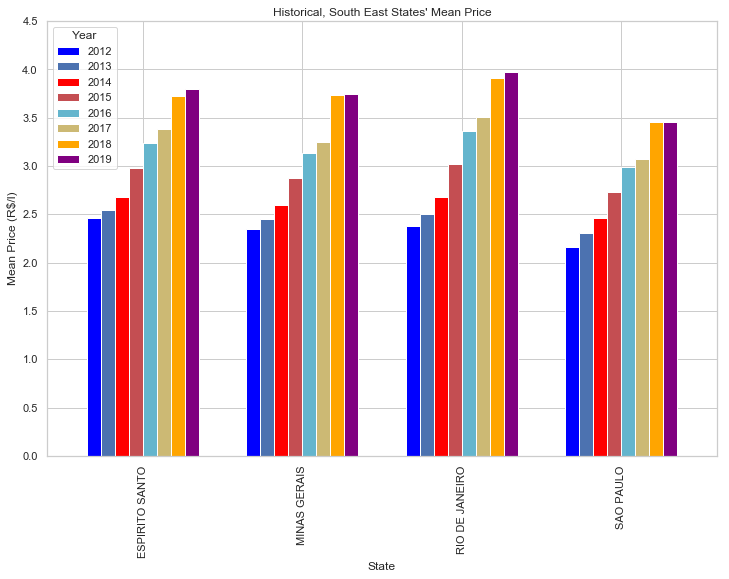

In [352]:
southeast = data[data['Region'] == 'SOUTH EAST'].groupby(['State','Year']).Mean_Mkt_Value.agg('mean').unstack()
southeast.plot(kind='bar', color=['blue', 'b', 'red', 'r', 'c', 'y', 'orange','purple'], width=0.7)
axes = plt.gca()
axes.set_ylim([0,4.5])
plt.ylabel('Mean Price (R$/l)')
plt.title("Historical, South East States' Mean Price")